# Code for comparing Peltiers

In [131]:
#initialize packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [132]:
#change to directory
import os
os.chdir('C:\\Users\\trevo\\OneDrive - UNT System\\PhD\\Ta Actuator\\Sensors and Actuators A- Physical\\Data')
#open excel
flexheat = pd.read_excel('data_4_19_2023.xlsx',sheet_name="flexheat")
fan = pd.read_excel('data_4_19_2023.xlsx',sheet_name="fan")
nofan = pd.read_excel('data_4_19_2023.xlsx',sheet_name="nofan")



In [133]:
#process ideal data
ideal = [1,1.024,1.061,1.061,1.085,1.305,1.372,1.476,1.494, 1.366,1.335,1.189,1.134,1.116,1.110,1.079,1.061,1.043,0.971,0.982,0.975,0.994,1.037,1.171,1.299,1.372,1.415,1.476,1.555,1.500,1.488,1.415,1.396,1.341,1.305,1.049,1.000,1.000,0.994,1.000,1.061,1.122,1.140,1.299,1.329,1.341,1.421,1.482,1.506,1.524,1.640,1.634,1.616,1.518,1.512,1.494,1.421,1.427,1.311,1.201,1.091,1.037]
#process time data
time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 48, 53, 58, 63, 68, 73, 78, 83, 88, 107, 112, 117, 122, 127, 132, 137, 142, 147, 152, 159, 164, 169, 174, 179, 184, 189, 194, 199, 204, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341]

In [134]:
#convert ideal to dataframe
ideal = pd.DataFrame(ideal)
time = pd.DataFrame(time)

In [135]:
#combine dataframes to be time and expansion
ideal = pd.concat([time,ideal],axis=1)

In [136]:
#rename columns to be time and expansion
ideal.columns = ['time (s)','expansion']


In [137]:
# set length of sample
length = 4 #mm
# convert expansion to strain
ideal['strain'] = ideal['expansion']*length

#create a elongation (mm) column by subtracting the length from strain
ideal['elongation (mm)'] = ideal['strain']-length


In [138]:
#take flexheat total height and subtract sample height
flexheat['elongation (mm)'] = flexheat['Total height'] - flexheat['sample height']
fan['elongation (mm)'] = fan['enlongation']
nofan['elongation (mm)'] = nofan['total height'] - nofan['sample height']

In [139]:
#rename the three dataframes columns so Time is time (s), elongation is elongation (mm), and temperature is temperature (C)
print('Renaming columns...')
flexheat = flexheat.rename(columns={'time':'time (s)','Elongation %':'elongation (%)'})
fan = fan.rename(columns={'Time':'time (s)','temp':'temperature (C)','Enlongation %':'elongation (%)'})
nofan = nofan.rename(columns={'Time':'time (s)','temp':'temperature (C)','enlongation %':'elongation (%)'})
#reorder the three dataframes so they are time, elongation, and temperature
print('Reordering columns...')
ideal['elongation (%)'] = (ideal['expansion']-1)*100
flexheat = flexheat[['time (s)','elongation (mm)','elongation (%)']]
fan = fan[['time (s)','elongation (mm)','temperature (C)','elongation (%)']]
nofan = nofan[['time (s)','elongation (mm)','temperature (C)', 'elongation (%)']]

Renaming columns...
Reordering columns...


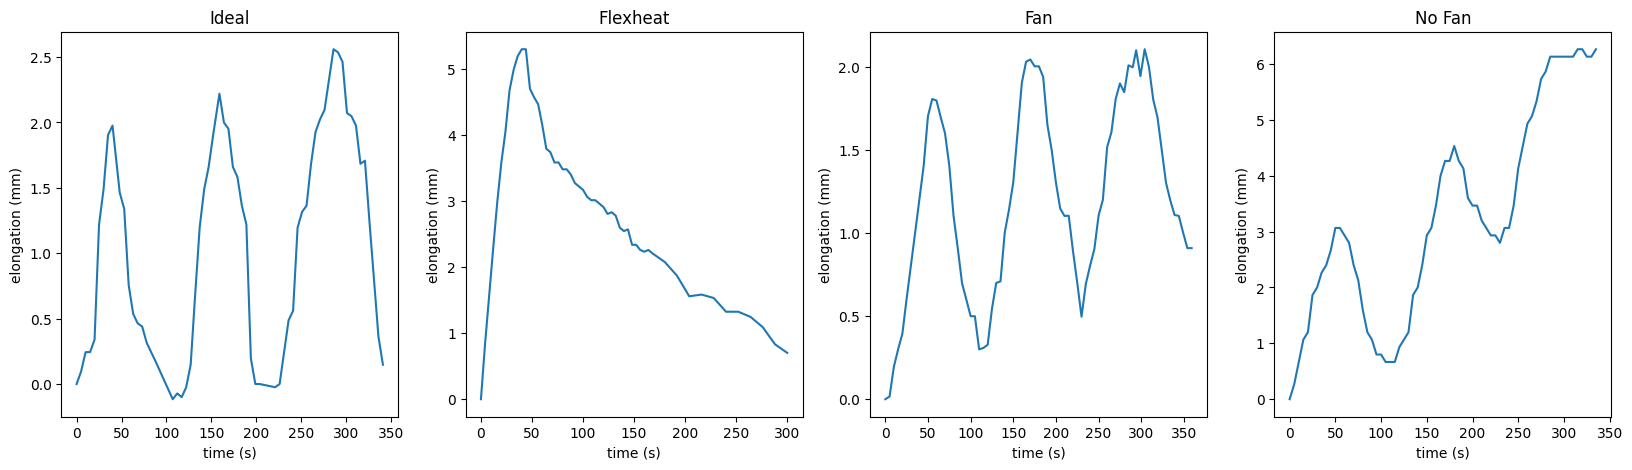

In [140]:
#plot the four dataframes
fig, ax = plt.subplots(1,4,figsize=(20,5))
sns.lineplot(x='time (s)',y='elongation (mm)',data=ideal,ax=ax[0])
sns.lineplot(x='time (s)',y='elongation (mm)',data=flexheat,ax=ax[1])
sns.lineplot(x='time (s)',y='elongation (mm)',data=fan,ax=ax[2])
sns.lineplot(x='time (s)',y='elongation (mm)',data=nofan,ax=ax[3])
ax[0].set_title('Ideal')
ax[1].set_title('Flexheat')
ax[2].set_title('Fan')
ax[3].set_title('No Fan')
ax[0].set_ylabel('elongation (mm)')
ax[0].set_xlabel('time (s)')
plt.show()

#save individual plots as svg
fig.savefig('peltiercomparisons.svg')

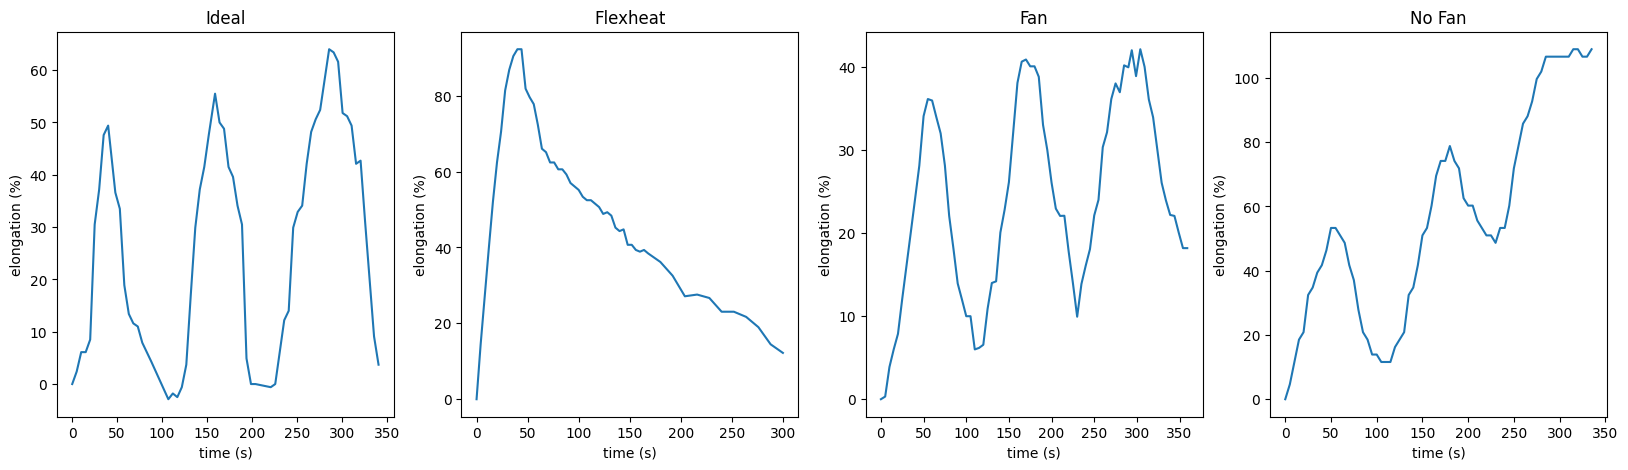

In [141]:
#plot the same graphs but as elongation %
fig, ax = plt.subplots(1,4,figsize=(20,5))
sns.lineplot(x='time (s)',y='elongation (%)',data=ideal,ax=ax[0])
sns.lineplot(x='time (s)',y='elongation (%)',data=flexheat,ax=ax[1])
sns.lineplot(x='time (s)',y='elongation (%)',data=fan,ax=ax[2])
sns.lineplot(x='time (s)',y='elongation (%)',data=nofan,ax=ax[3])
ax[0].set_title('Ideal')
ax[1].set_title('Flexheat')
ax[2].set_title('Fan')
ax[3].set_title('No Fan')
ax[0].set_ylabel('elongation (%)')
ax[0].set_xlabel('time (s)')
plt.show()

#save individual plots as svg
fig.savefig('peltiercomparisonspercent.svg')


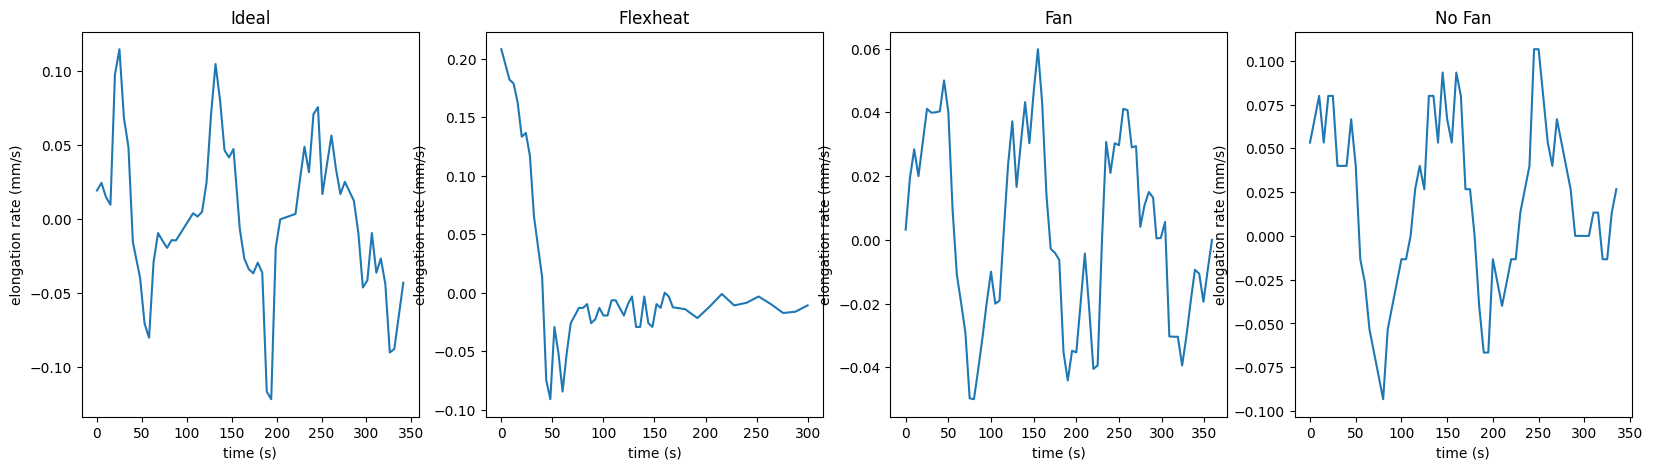

In [142]:
#take the derivative of the four graphs to get velocity in mm/s
ideal['velocity (mm/s)'] = np.gradient(ideal['elongation (mm)'],ideal['time (s)'])
flexheat['velocity (mm/s)'] = np.gradient(flexheat['elongation (mm)'],flexheat['time (s)'])
fan['velocity (mm/s)'] = np.gradient(fan['elongation (mm)'],fan['time (s)'])
nofan['velocity (mm/s)'] = np.gradient(nofan['elongation (mm)'],nofan['time (s)'])

#plot the four velocity graphs
fig, ax = plt.subplots(1,4,figsize=(20,5))
sns.lineplot(x='time (s)',y='velocity (mm/s)',data=ideal,ax=ax[0])
sns.lineplot(x='time (s)',y='velocity (mm/s)',data=flexheat,ax=ax[1])
sns.lineplot(x='time (s)',y='velocity (mm/s)',data=fan,ax=ax[2])
sns.lineplot(x='time (s)',y='velocity (mm/s)',data=nofan,ax=ax[3])
ax[0].set_title('Ideal')
ax[1].set_title('Flexheat')
ax[2].set_title('Fan')
ax[3].set_title('No Fan')
ax[0].set_ylabel('elongation rate (mm/s)')
ax[1].set_ylabel('elongation rate (mm/s)')
ax[2].set_ylabel('elongation rate (mm/s)')
ax[3].set_ylabel('elongation rate (mm/s)')
ax[0].set_xlabel('time (s)')
plt.show()

#save figure
fig.savefig('peltiercomparisonsvelocity.svg')

In [143]:
#mass 
m_ideal = 4.62; #grams
m = 9.53; #grams

#calculate mechanical power with P = Fv and convert from g to kg for ideal
F_ideal = m_ideal*9.81/1000; #N
#print force
print('Force (N):',F_ideal)
ideal['mechanical power (W)'] = F_ideal*ideal['velocity (mm/s)']

#calculate mechanical power with P = Fv and convert from g to kg
F = m*9.81/1000; #N
#print force
print('Force (N):',F)
flexheat['mechanical power (W)'] = F*flexheat['velocity (mm/s)']
fan['mechanical power (W)'] = F*fan['velocity (mm/s)']
nofan['mechanical power (W)'] = F*nofan['velocity (mm/s)']


Force (N): 0.0453222
Force (N): 0.0934893


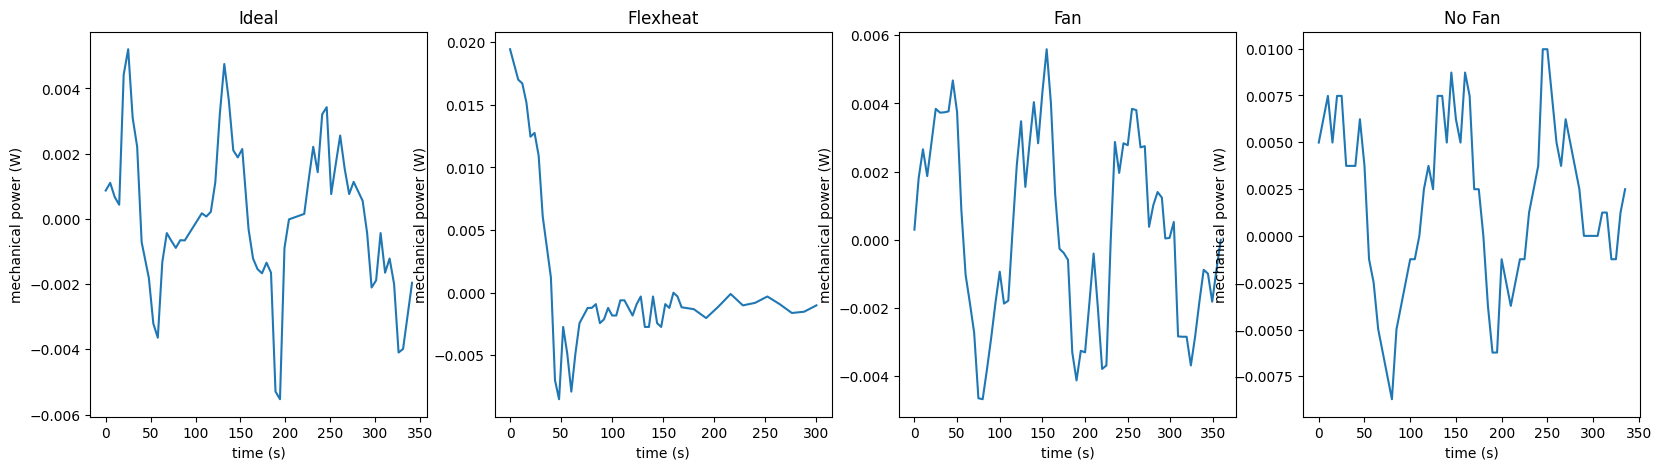

In [144]:
#plot the four mechanical power graphs
fig, ax = plt.subplots(1,4,figsize=(20,5))
sns.lineplot(x='time (s)',y='mechanical power (W)',data=ideal,ax=ax[0])
sns.lineplot(x='time (s)',y='mechanical power (W)',data=flexheat,ax=ax[1])
sns.lineplot(x='time (s)',y='mechanical power (W)',data=fan,ax=ax[2])
sns.lineplot(x='time (s)',y='mechanical power (W)',data=nofan,ax=ax[3])
ax[0].set_title('Ideal')
ax[1].set_title('Flexheat')
ax[2].set_title('Fan')
ax[3].set_title('No Fan')
ax[0].set_ylabel('mechanical power (W)')
ax[0].set_xlabel('time (s)')
plt.show()

#save figure 
fig.savefig('peltiercomparisonsmechanicalpower.svg')

In [145]:
#integrate the power to get energy for all four graphs
ideal['energy (J)'] = np.trapz(ideal['mechanical power (W)'],ideal['time (s)'])
flexheat['energy (J)'] = np.trapz(flexheat['mechanical power (W)'],flexheat['time (s)'])
fan['energy (J)'] = np.trapz(fan['mechanical power (W)'],fan['time (s)'])
nofan['energy (J)'] = np.trapz(nofan['mechanical power (W)'],nofan['time (s)'])

In [146]:
#print the same but call it the mechanical energy
print('Ideal mechanical energy (J):',ideal['energy (J)'].iloc[-1])
print('Flexheat mechanical energy (J):',flexheat['energy (J)'].iloc[-1])
print('Fan mechanical energy (J):',fan['energy (J)'].iloc[-1])
print('No Fan mechanical energy (J):',nofan['energy (J)'].iloc[-1])

Ideal mechanical energy (J): 0.01131541186402474
Flexheat mechanical energy (J): 0.06481924800000013
Fan mechanical energy (J): 0.08905323271500015
No Fan mechanical energy (J): 0.5855256600697677


In [147]:
power_ideal = 20# W
power_flexheat = 13 #W
power_fanpelt = 13 #W
power_fan = 2.2 #W
power_nofan =  13 #W

time_ideal = 341 - 61 #s
time_flexheat = 40 #s
time_fanpelt = 359 - 49 #s
time_fan = 359 #s
time_nofan = 335 - 50 #s

#calculate the energy for all four graphs
energy_ideal = power_ideal*time_ideal #J
energy_flexheat = power_flexheat*time_flexheat #J
energy_fan = power_fan*time_fan + power_fanpelt*time_fanpelt #J
energy_nofan = power_nofan*time_nofan #J

#print energy for all four graphs
print('Ideal electrical energy (J):',energy_ideal)
print('Flexheat electrical energy (J):',energy_flexheat)
print('Fan electrical energy (J):',energy_fan)
print('No Fan electrical energy (J):',energy_nofan)

Ideal electrical energy (J): 5600
Flexheat electrical energy (J): 520
Fan electrical energy (J): 4819.8
No Fan electrical energy (J): 3705


In [148]:
#calculate the efficiency for all four graphs by dividing mechanical energy by electrical
efficiency_ideal = ideal['energy (J)'].iloc[-1]/energy_ideal
efficiency_flexheat = flexheat['energy (J)'].iloc[-1]/energy_flexheat
efficiency_fan = fan['energy (J)'].iloc[-1]/energy_fan
efficiency_nofan = nofan['energy (J)'].iloc[-1]/energy_nofan

#print efficiency for all four graphs
print('Ideal efficiency:',efficiency_ideal)
print('Flexheat efficiency:',efficiency_flexheat)
print('Fan efficiency:',efficiency_fan)
print('No Fan efficiency:',efficiency_nofan)

#print horizontal line
print('---------------------')

#normalize the efficiency by dividing by the no fan efficiency
normalized_efficiency_ideal = efficiency_ideal/efficiency_nofan
normalized_efficiency_flexheat = efficiency_flexheat/efficiency_nofan
normalized_efficiency_fan = efficiency_fan/efficiency_nofan
normalized_efficiency_nofan = efficiency_nofan/efficiency_nofan

#print normalized efficiency for all four graphs
print('Ideal normalized efficiency:',normalized_efficiency_ideal)
print('Flexheat normalized efficiency:',normalized_efficiency_flexheat)
print('Fan normalized efficiency:',normalized_efficiency_fan)
print('No Fan normalized efficiency:',normalized_efficiency_nofan)

Ideal efficiency: 2.020609261432989e-06
Flexheat efficiency: 0.00012465240000000027
Fan efficiency: 1.8476541083654953e-05
No Fan efficiency: 0.00015803661540344607
---------------------
Ideal normalized efficiency: 0.012785703213616967
Flexheat normalized efficiency: 0.7887564516727948
Fan normalized efficiency: 0.11691303965531562
No Fan normalized efficiency: 1.0


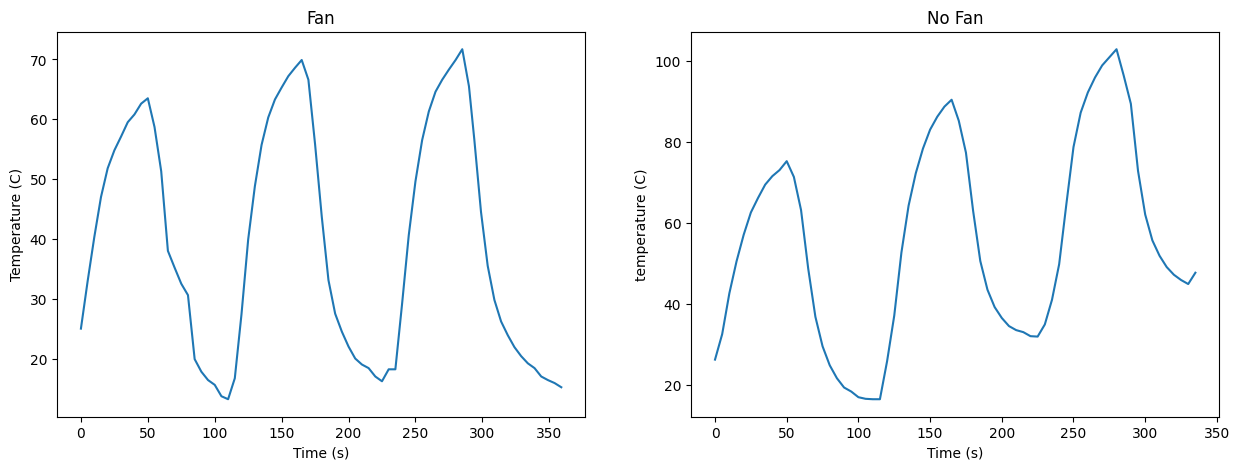

In [149]:
#plot temperatures for fan and nofan
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.lineplot(x='time (s)',y='temperature (C)',data=fan,ax=ax[0])
sns.lineplot(x='time (s)',y='temperature (C)',data=nofan,ax=ax[1])
ax[0].set_title('Fan')
ax[1].set_title('No Fan')
ax[0].set_ylabel('Temperature (C)')
ax[0].set_xlabel('Time (s)')
ax[1].set_xlabel('Time (s)')
plt.show()

#save figure   
fig.savefig('peltiercomparisonsfan.svg')

In [150]:
energypeltier = pd.read_excel('data_4_19_2023.xlsx',sheet_name="energypeltier")
energyheater = pd.read_excel('data_4_19_2023.xlsx',sheet_name="energyheater")

In [151]:
#rename Time column to time (s)
energypeltier = energypeltier.rename(columns={'Time':'time (s)'})
energyheater = energyheater.rename(columns={'Time':'time (s)'})

#for energypeltier, only have columns for time (s), Flexible 1.5 Watts, Flexible 2.8 Watts, and Flexible 4 Watts
energypeltier = energypeltier[['time (s)','Flexible 1.5 Watts','Flexible 2.8 Watts','Flexible 4 Watts']]

#for energyheater, only have columns for Heater 5.6 Watts, Heater 7 Watts, and Heater 10 Watts
energyheater = energyheater[['time (s)','Heater 5.6 Watts','Heater 7 Watts','Heater 10 Watts']]

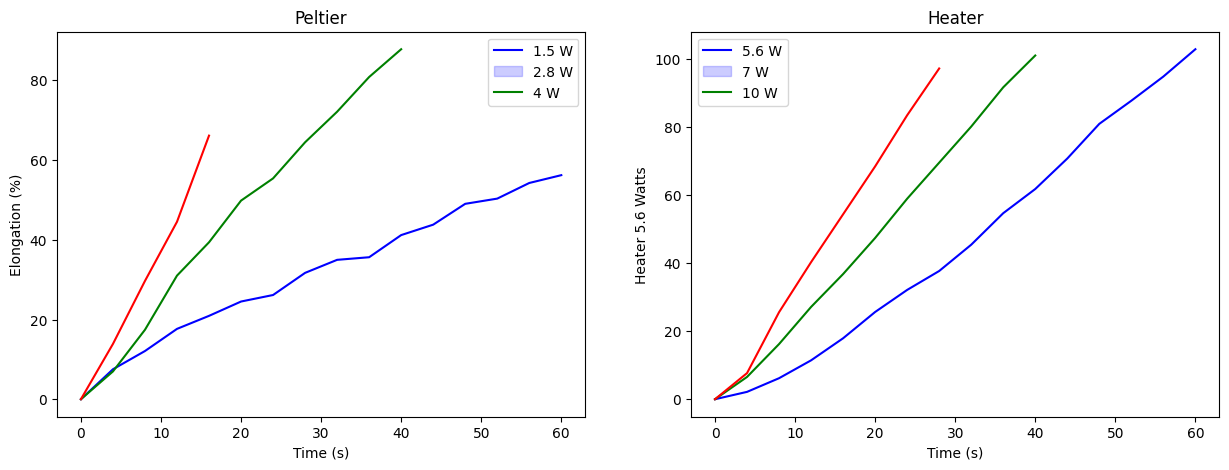

In [152]:
#plot
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.lineplot(x='time (s)',y='Flexible 1.5 Watts',data=energypeltier,ax=ax[0],color='blue')
sns.lineplot(x='time (s)',y='Flexible 2.8 Watts',data=energypeltier,ax=ax[0],color='green')
sns.lineplot(x='time (s)',y='Flexible 4 Watts',data=energypeltier,ax=ax[0],color='red')
sns.lineplot(x='time (s)',y='Heater 5.6 Watts',data=energyheater,ax=ax[1],color='blue')
sns.lineplot(x='time (s)',y='Heater 7 Watts',data=energyheater,ax=ax[1],color='green')
sns.lineplot(x='time (s)',y='Heater 10 Watts',data=energyheater,ax=ax[1],color='red')
ax[0].set_title('Peltier')
ax[1].set_title('Heater')
ax[0].set_ylabel('Elongation (%)')
ax[0].set_xlabel('Time (s)')
ax[1].set_xlabel('Time (s)')
ax[0].legend(['1.5 W','2.8 W','4 W'])
ax[1].legend(['5.6 W','7 W','10 W'])
plt.show()


#save plot as svg
fig.savefig('peltier_heater.svg')

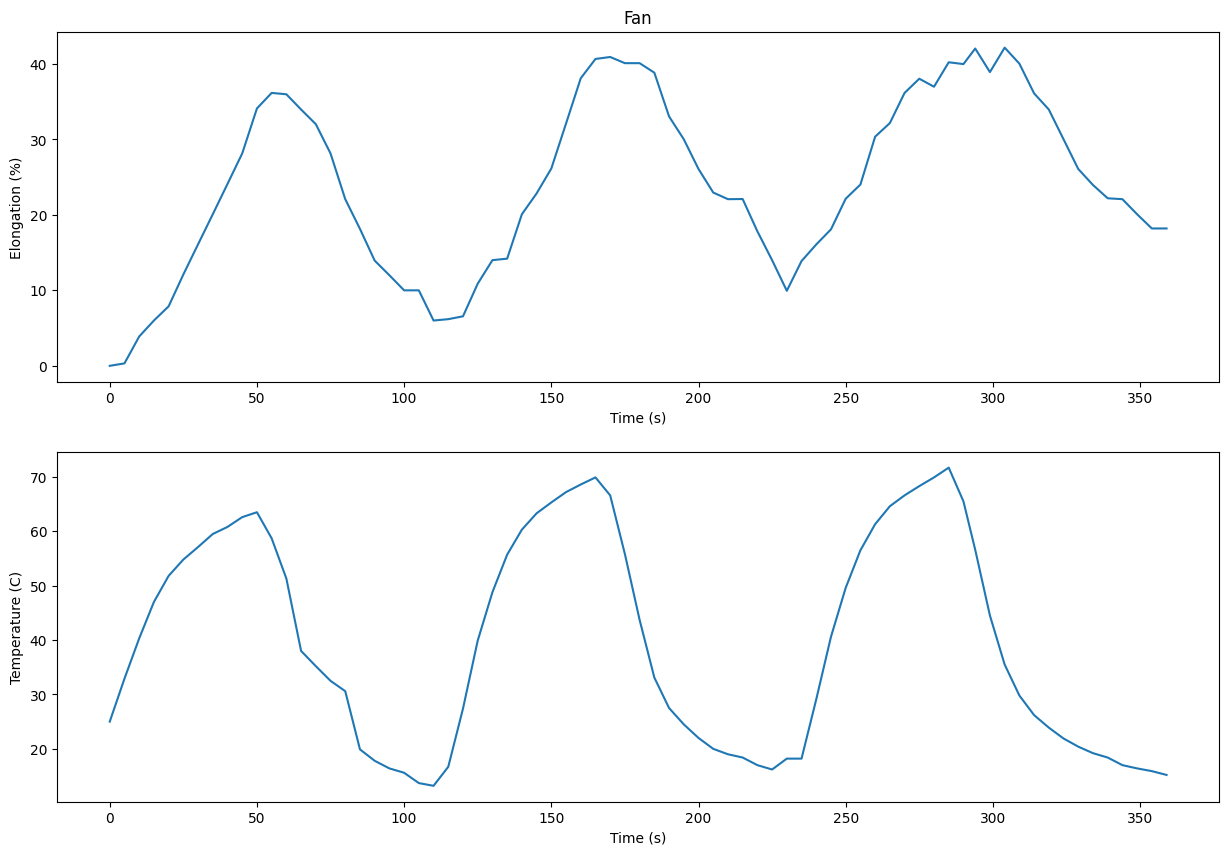

In [153]:
#plot fan a vertical subplot of fan elongation percentage and temperature
fig, ax = plt.subplots(2,1,figsize=(15,10))
sns.lineplot(x='time (s)',y='elongation (%)',data=fan,ax=ax[0])
sns.lineplot(x='time (s)',y='temperature (C)',data=fan,ax=ax[1])
ax[0].set_title('Fan')
ax[0].set_ylabel('Elongation (%)')
ax[0].set_xlabel('Time (s)')
ax[1].set_ylabel('Temperature (C)')
ax[1].set_xlabel('Time (s)')
plt.show()

#save plot as svg
fig.savefig('peltier_fan.svg')

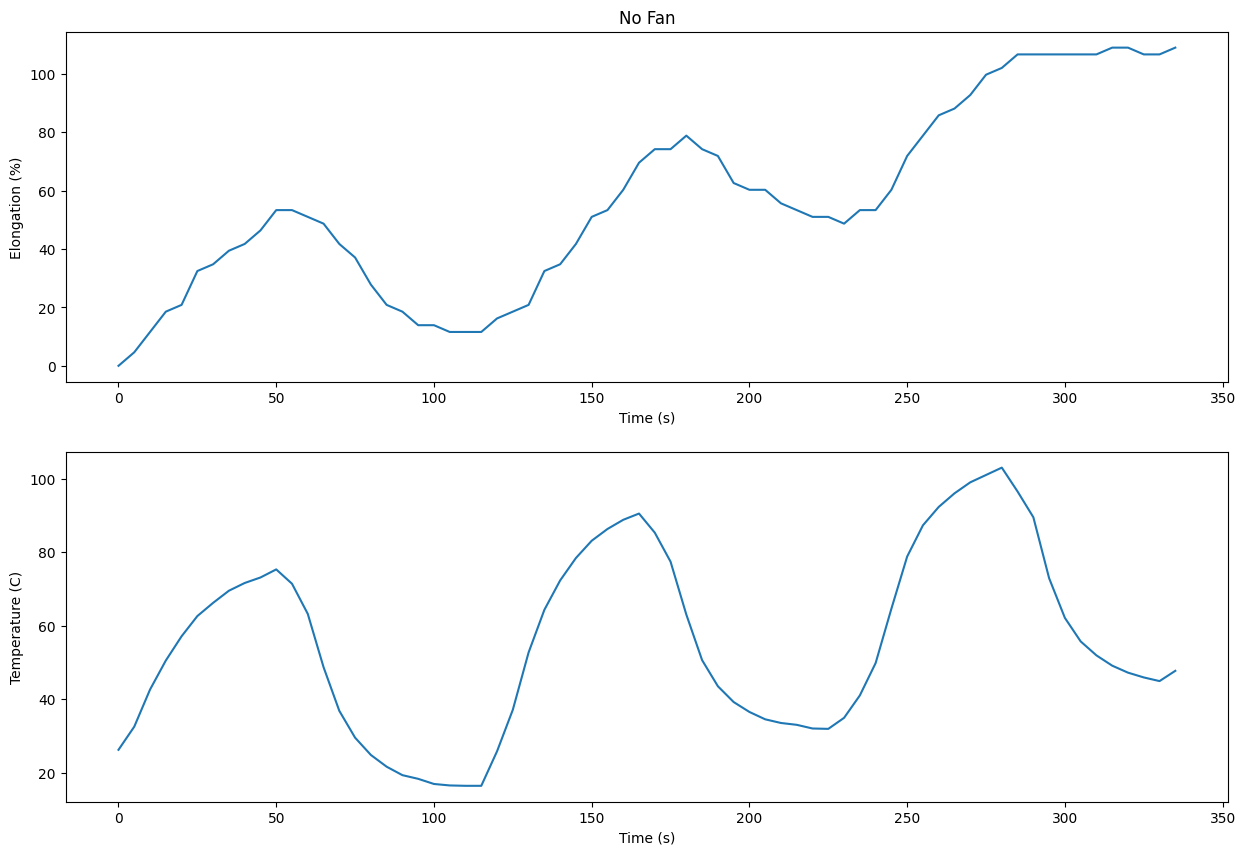

In [154]:
#now do the same for nofan data
fig, ax = plt.subplots(2,1,figsize=(15,10))
sns.lineplot(x='time (s)',y='elongation (%)',data=nofan,ax=ax[0])
sns.lineplot(x='time (s)',y='temperature (C)',data=nofan,ax=ax[1])
ax[0].set_title('No Fan')
ax[0].set_ylabel('Elongation (%)')
ax[0].set_xlabel('Time (s)')
ax[1].set_ylabel('Temperature (C)')
ax[1].set_xlabel('Time (s)')
plt.show()

#save plot as svg
fig.savefig('peltier_nofan.svg')

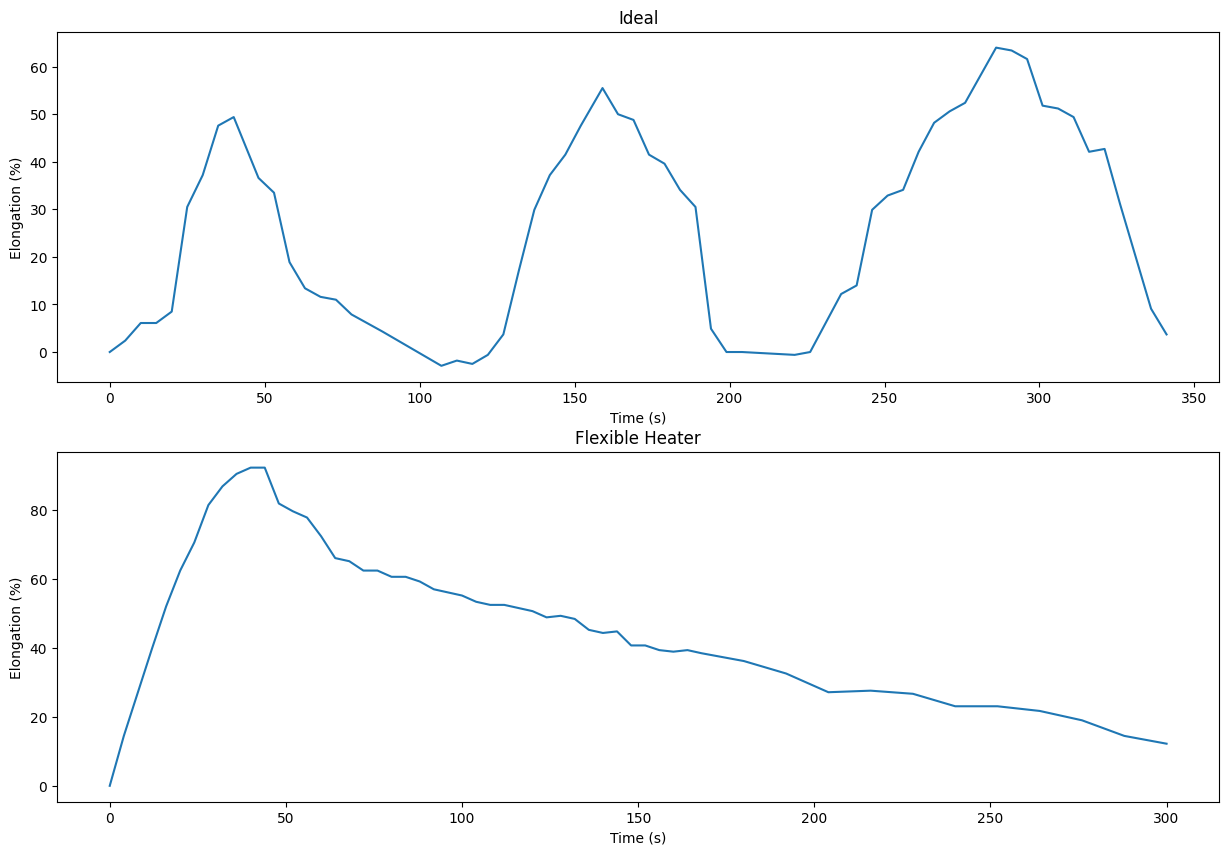

In [155]:
#create a vertical subplot of the ideal elongation and the flexheater elongation
fig, ax = plt.subplots(2,1,figsize=(15,10))
sns.lineplot(x='time (s)',y='elongation (%)',data=ideal,ax=ax[0])
sns.lineplot(x='time (s)',y='elongation (%)',data=flexheat,ax=ax[1])
ax[0].set_title('Ideal')
ax[0].set_ylabel('Elongation (%)')
ax[0].set_xlabel('Time (s)')
ax[1].set_title('Flexible Heater')
ax[1].set_ylabel('Elongation (%)')
ax[1].set_xlabel('Time (s)')
plt.show()

#save plot as svg
fig.savefig('peltier_ideal_flexheat.svg')